# Using Kaggle Datasets:

The following code uses data from kaggle:https://www.kaggle.com/tunguz/big-five-personality-test

In [25]:
import numpy as np 
import os
from scipy.stats import zscore
import pandas as pd

# Loading the Data:
Reading the data and displaying it as a table.

In [37]:
filename_read = pd.read_csv("data\IPIP-FFM-data-8Nov2018\data-final.csv", sep='\t')#seperate data where a '\t' is located (otherwisw table is displayed incorrectly formatted)
data = data_raw.copy()
pd.options.display.max_columns = 150

data.drop(data.columns[50:107], axis=1, inplace=True)
data.drop(data.columns[51:], axis=1, inplace=True)
data.dropna(inplace=True)# eliminate n/a values
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


In [54]:
#Function to display a bar chart
def displayChart(groupname):
    plt.figure(figsize=(40,60))
    for i in range(1, 11):
        plt.subplot(10,5,i)
        plt.hist(data[groupname[i-1]], bins=14)
        plt.title(groupname[i-1], fontsize=18)

To make the data easy to read, bellow are some bar charts that document the responses to each question in the personality test. these can be split into five seperate features:

     1. Openness to experience (inventive/curious vs. consistent/cautious)
     2. Conscientiousness (efficient/organized vs. easy-going/careless)
     3. Extroversion (outgoing/energetic vs. solitary/reserved)
     4. Agreeableness (friendly/compassionate vs. challenging/detached)
     5. Neuroticism (sensitive/nervous vs. secure/confident)

Extroversion Personality


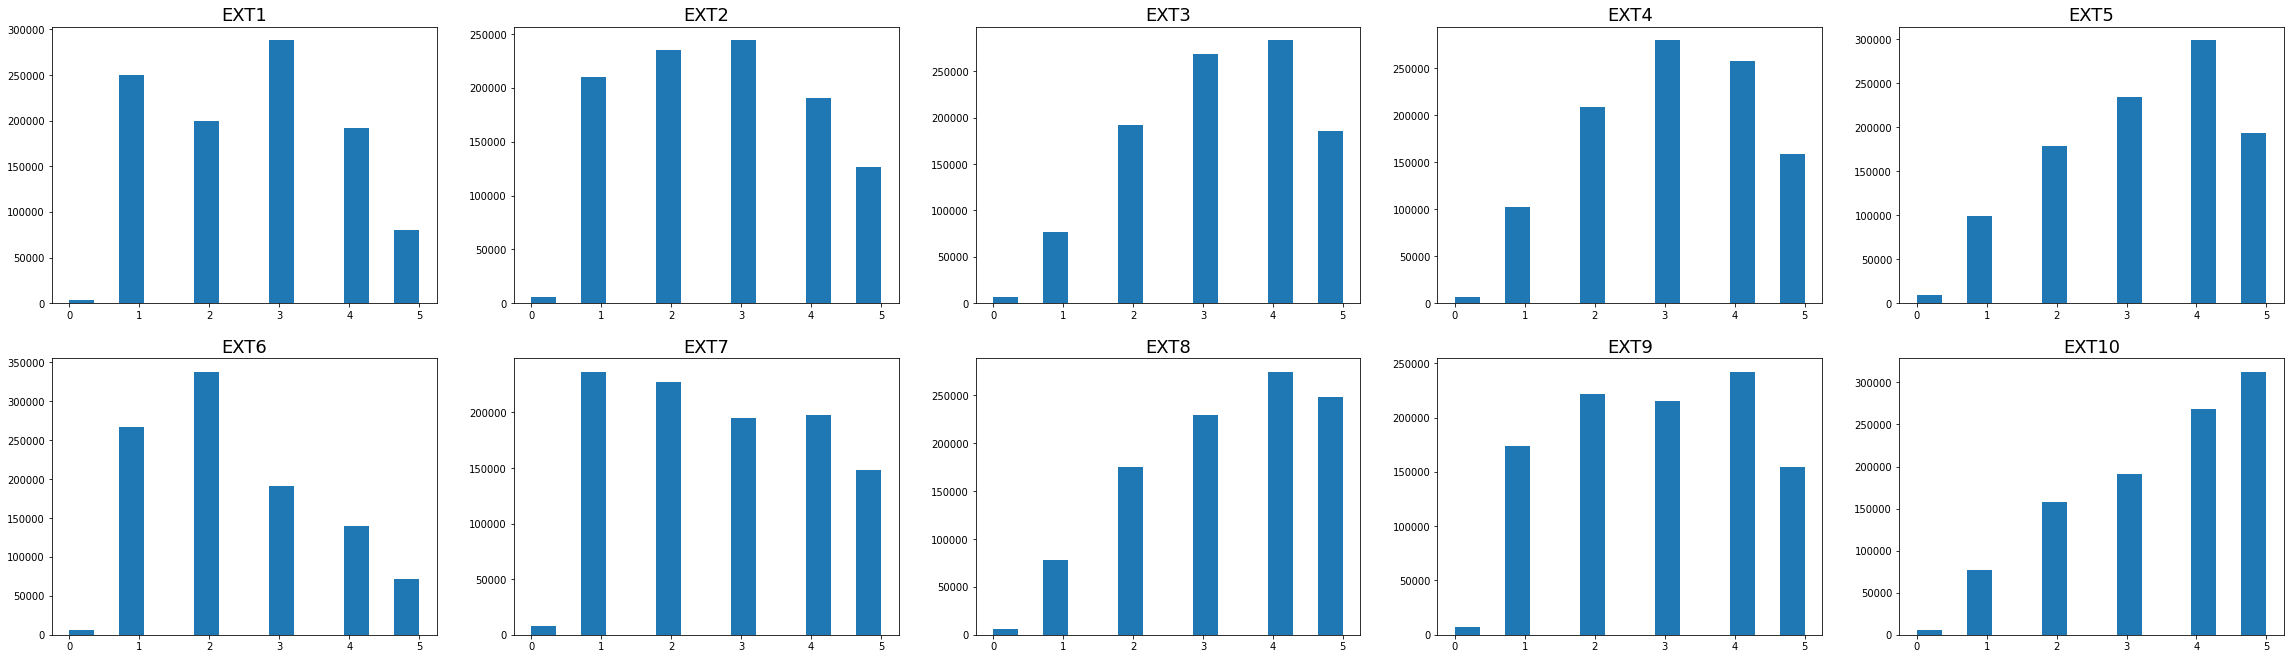

In [62]:
# five mesurements seperated so we can observe the responses 
EXT = [column for column in data if column.startswith('EXT')]
EST = [column for column in data if column.startswith('EST')]
AGR = [column for column in data if column.startswith('AGR')]
CSN = [column for column in data if column.startswith('CSN')]
OPN = [column for column in data if column.startswith('OPN')]

#bar chart
print('Extroversion Personality')
displayChart(EXT)

Neuroticism Personality


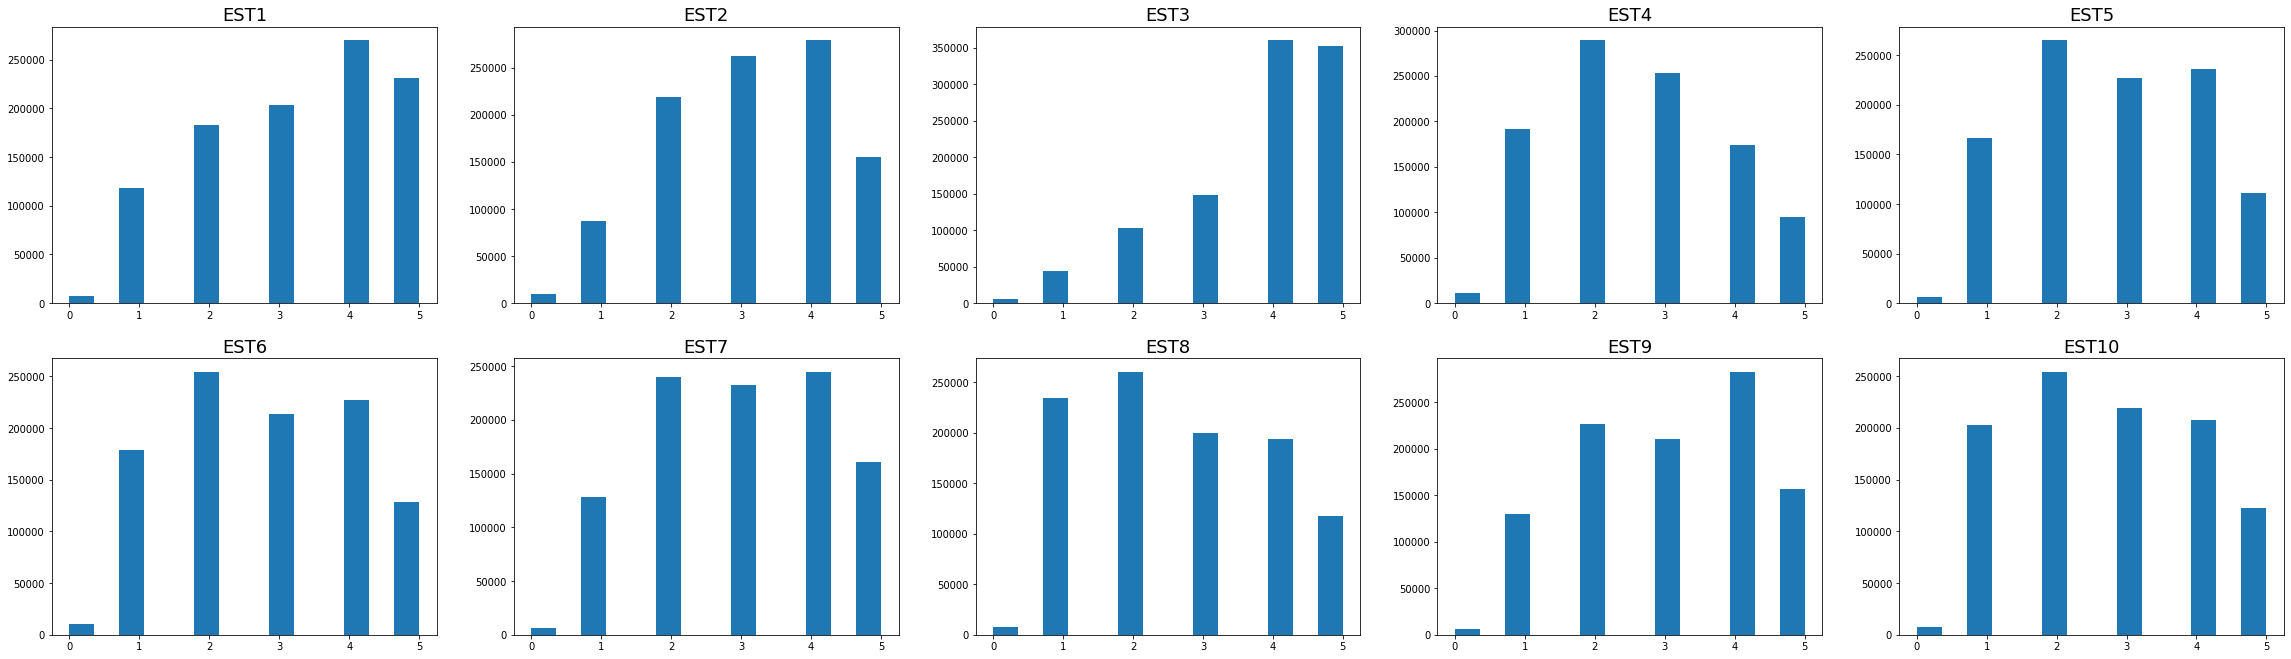

In [63]:
print('Neuroticism Personality')
vis_questions(EST)

Agreeable Personality


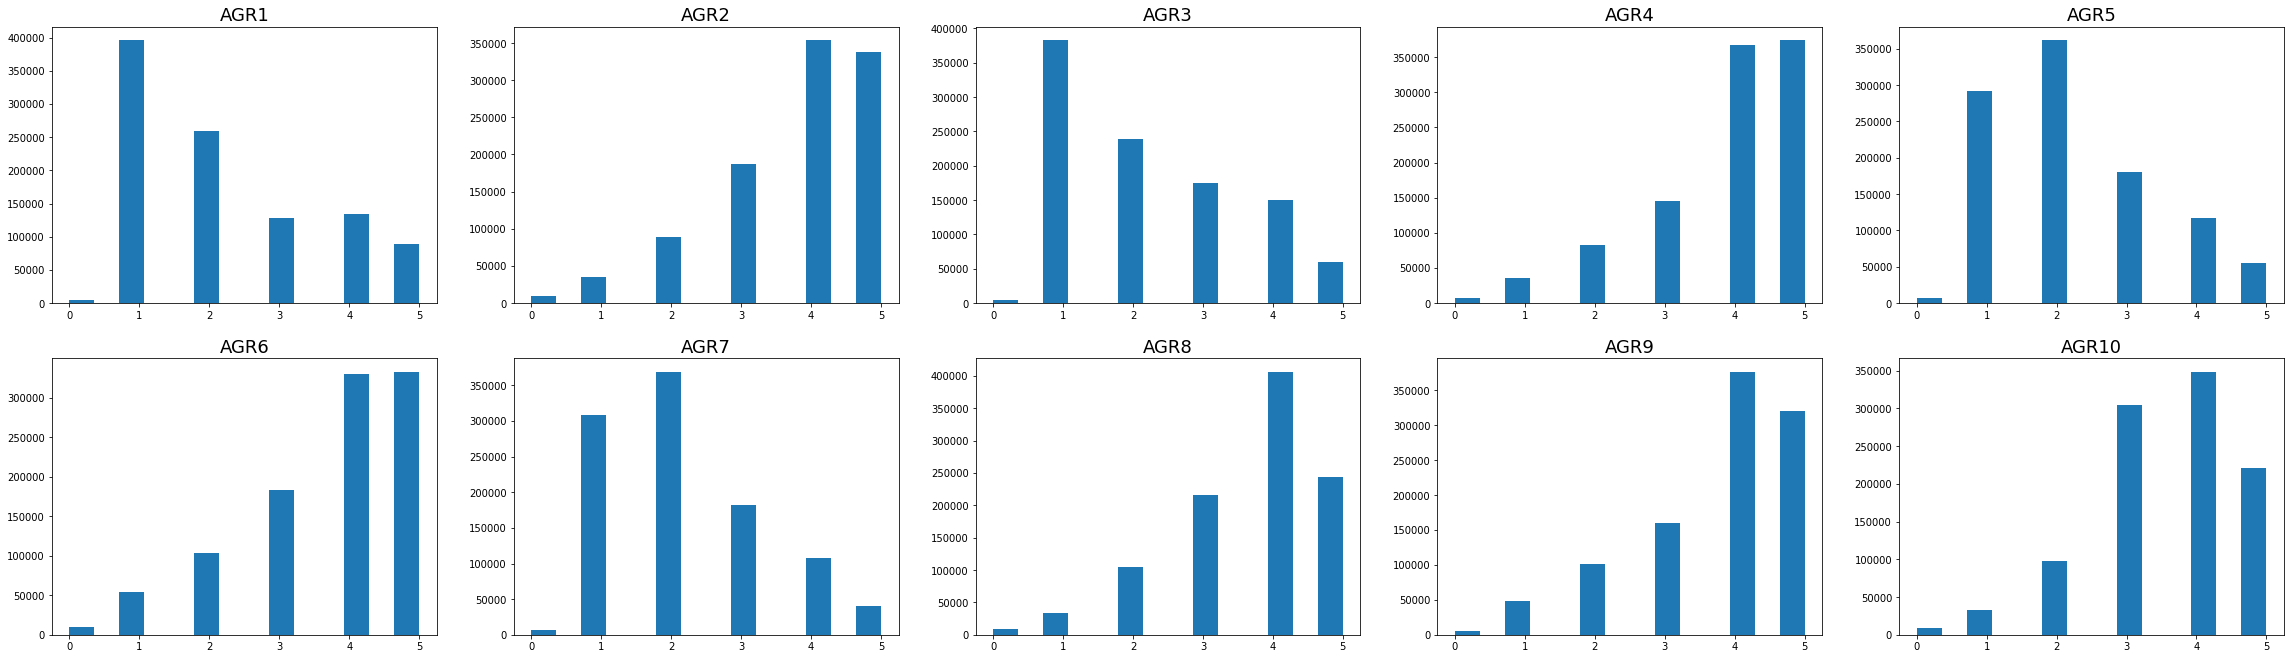

In [64]:
print('Agreeable Personality')
vis_questions(AGR)

Conscientious Personality


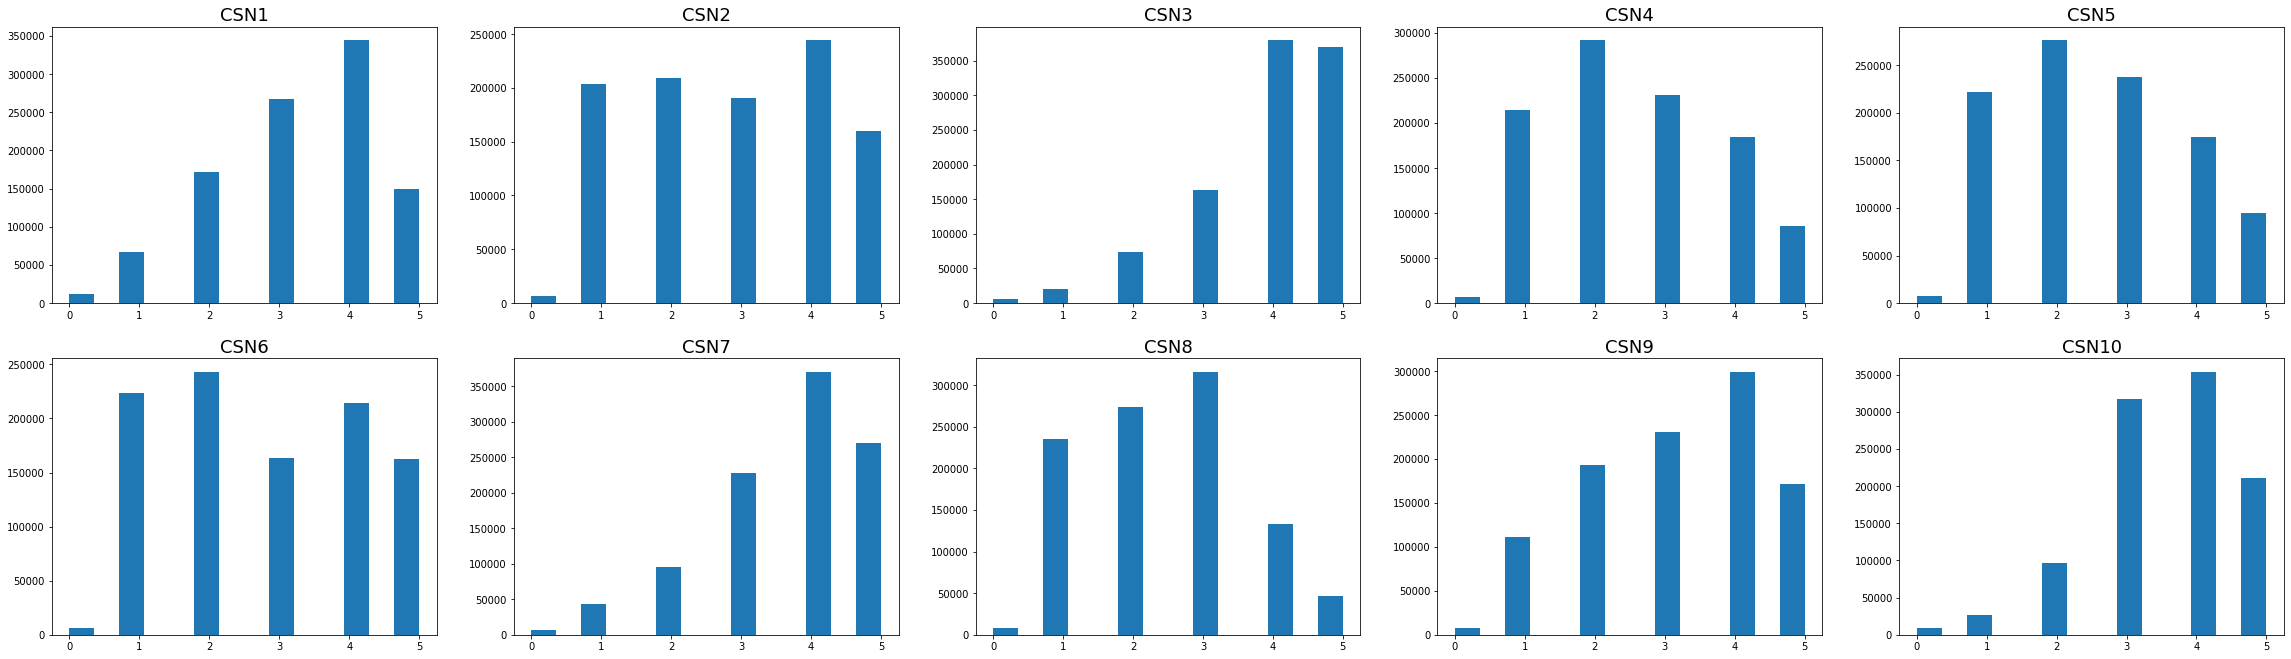

In [65]:
print('Conscientious Personality')
vis_questions(CSN)

Open Personality


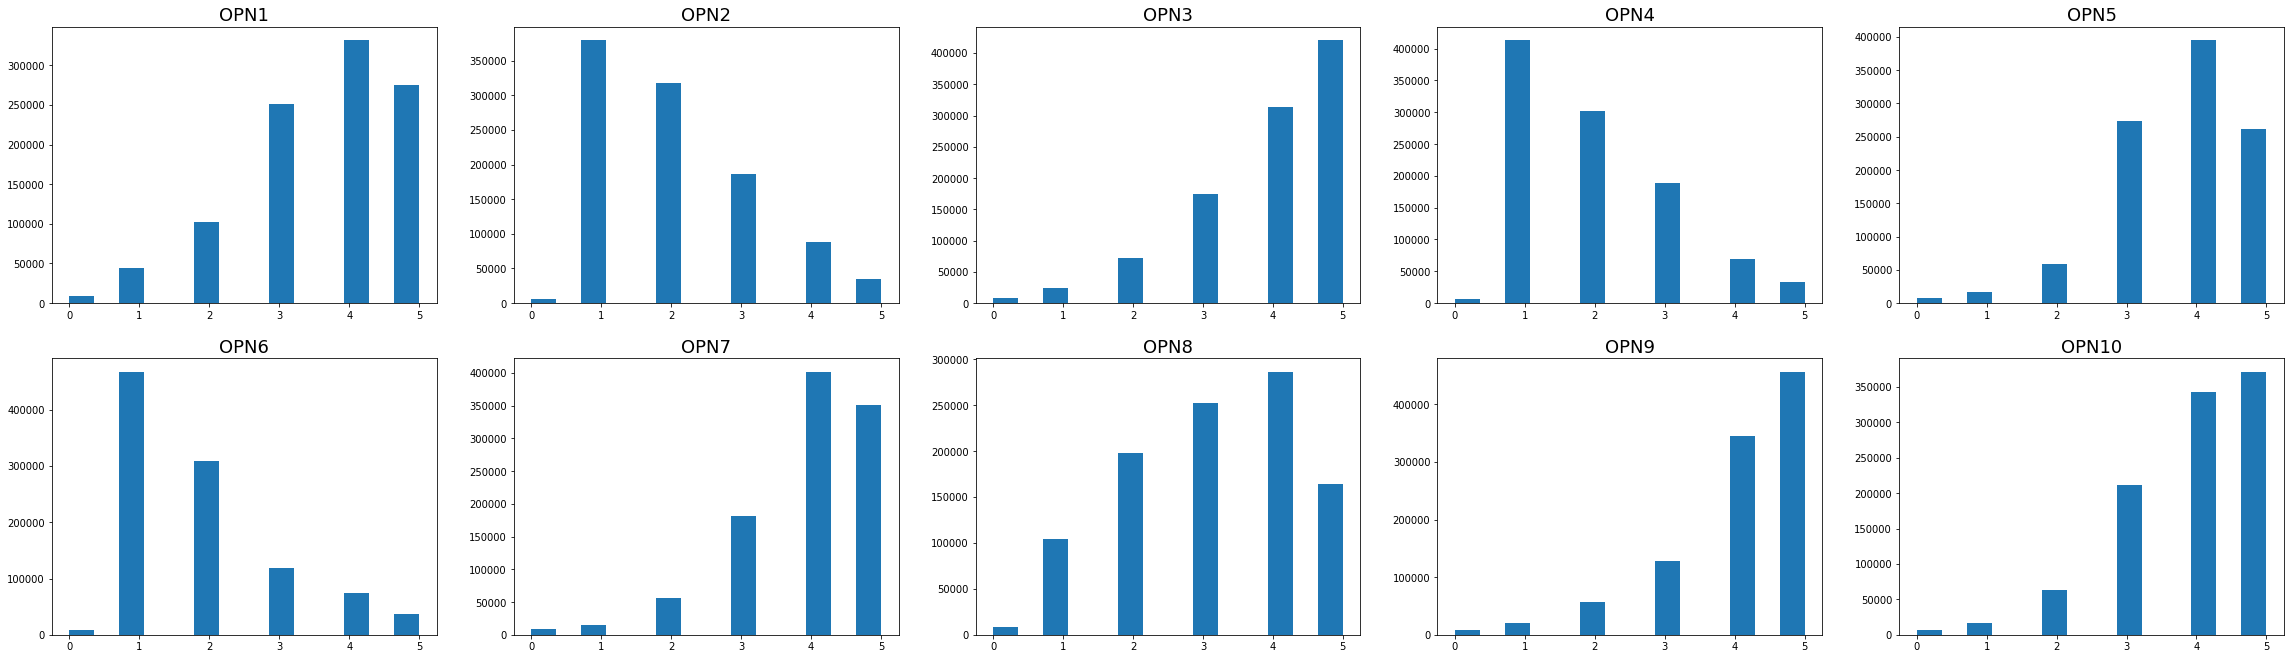

In [66]:
print('Open Personality')
vis_questions(OPN)

# Cleaning up the data:

Using https://www.kaggle.com/gkristiellj/notebook27a0ce3c3a/edit# as a refference:


Ideas: When we produce a music reccomendation prediction, we can feed the clean data (i.e calculating what personality type each row is) and visualise this? 